In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
DataFrame = pd.read_csv('adult.csv')
DataFrame

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
DataFrame.replace("?", np.nan, inplace=True)

In [ ]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
DataFrame.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
DataFrame = DataFrame.dropna()
DataFrame

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
DataFrame.duplicated().sum()

47

In [ ]:
DataFrame = DataFrame.drop_duplicates()
DataFrame


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
FeaturesWithCategoricalValues = DataFrame.select_dtypes(include=['object']).columns.tolist()
FeaturesWithNumericalValues = DataFrame.select_dtypes(exclude=['object']).columns.tolist()
print("Numerical Features:", FeaturesWithNumericalValues)
print("\nCategorical Variables:", FeaturesWithCategoricalValues)

Numerical Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Categorical Variables: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [ ]:
NumericalStatisitics = DataFrame.describe()
print("\nDescriptive Statistics for Numerical Features:")
NumericalStatisitics


Descriptive Statistics for Numerical Features:


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
CategoricalStatisitics = DataFrame.describe(include=['object'])
print("\nDescriptive Statistics for Categorical Features:")
CategoricalStatisitics


Descriptive Statistics for Categorical Features:


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


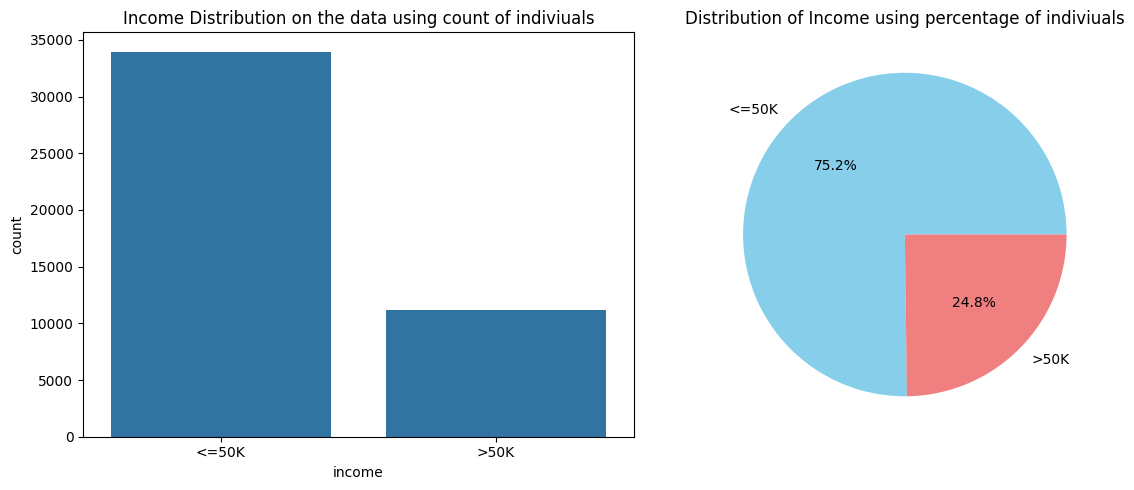

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='income', data=DataFrame, ax=axes[0])
axes[0].set_title('Income Distribution on the data using count of indiviuals')
axes[1].pie(DataFrame['income'].value_counts(), labels=DataFrame['income'].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Distribution of Income using percentage of indiviuals')
plt.tight_layout()
plt.show()

OriginalDataFrame = DataFrame.copy()
OriginalDataFrame['income'] = OriginalDataFrame['income'].replace({'<=50K': 0, '>50K': 1})

In [ ]:
RangeOfAges = [0, 20, 30, 40, 50, 60, 70, np.inf]
AlternativeRange = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
DataFrame['age_category'] = pd.cut(DataFrame['age'], bins=RangeOfAges, labels=AlternativeRange, right=False)
print(DataFrame[['age', 'age_category']])

       age age_category
0       25        21-30
1       38        31-40
2       28        21-30
3       44        41-50
5       34        31-40
...    ...          ...
48837   27        21-30
48838   40        41-50
48839   58        51-60
48840   22        21-30
48841   52        51-60

[45175 rows x 2 columns]


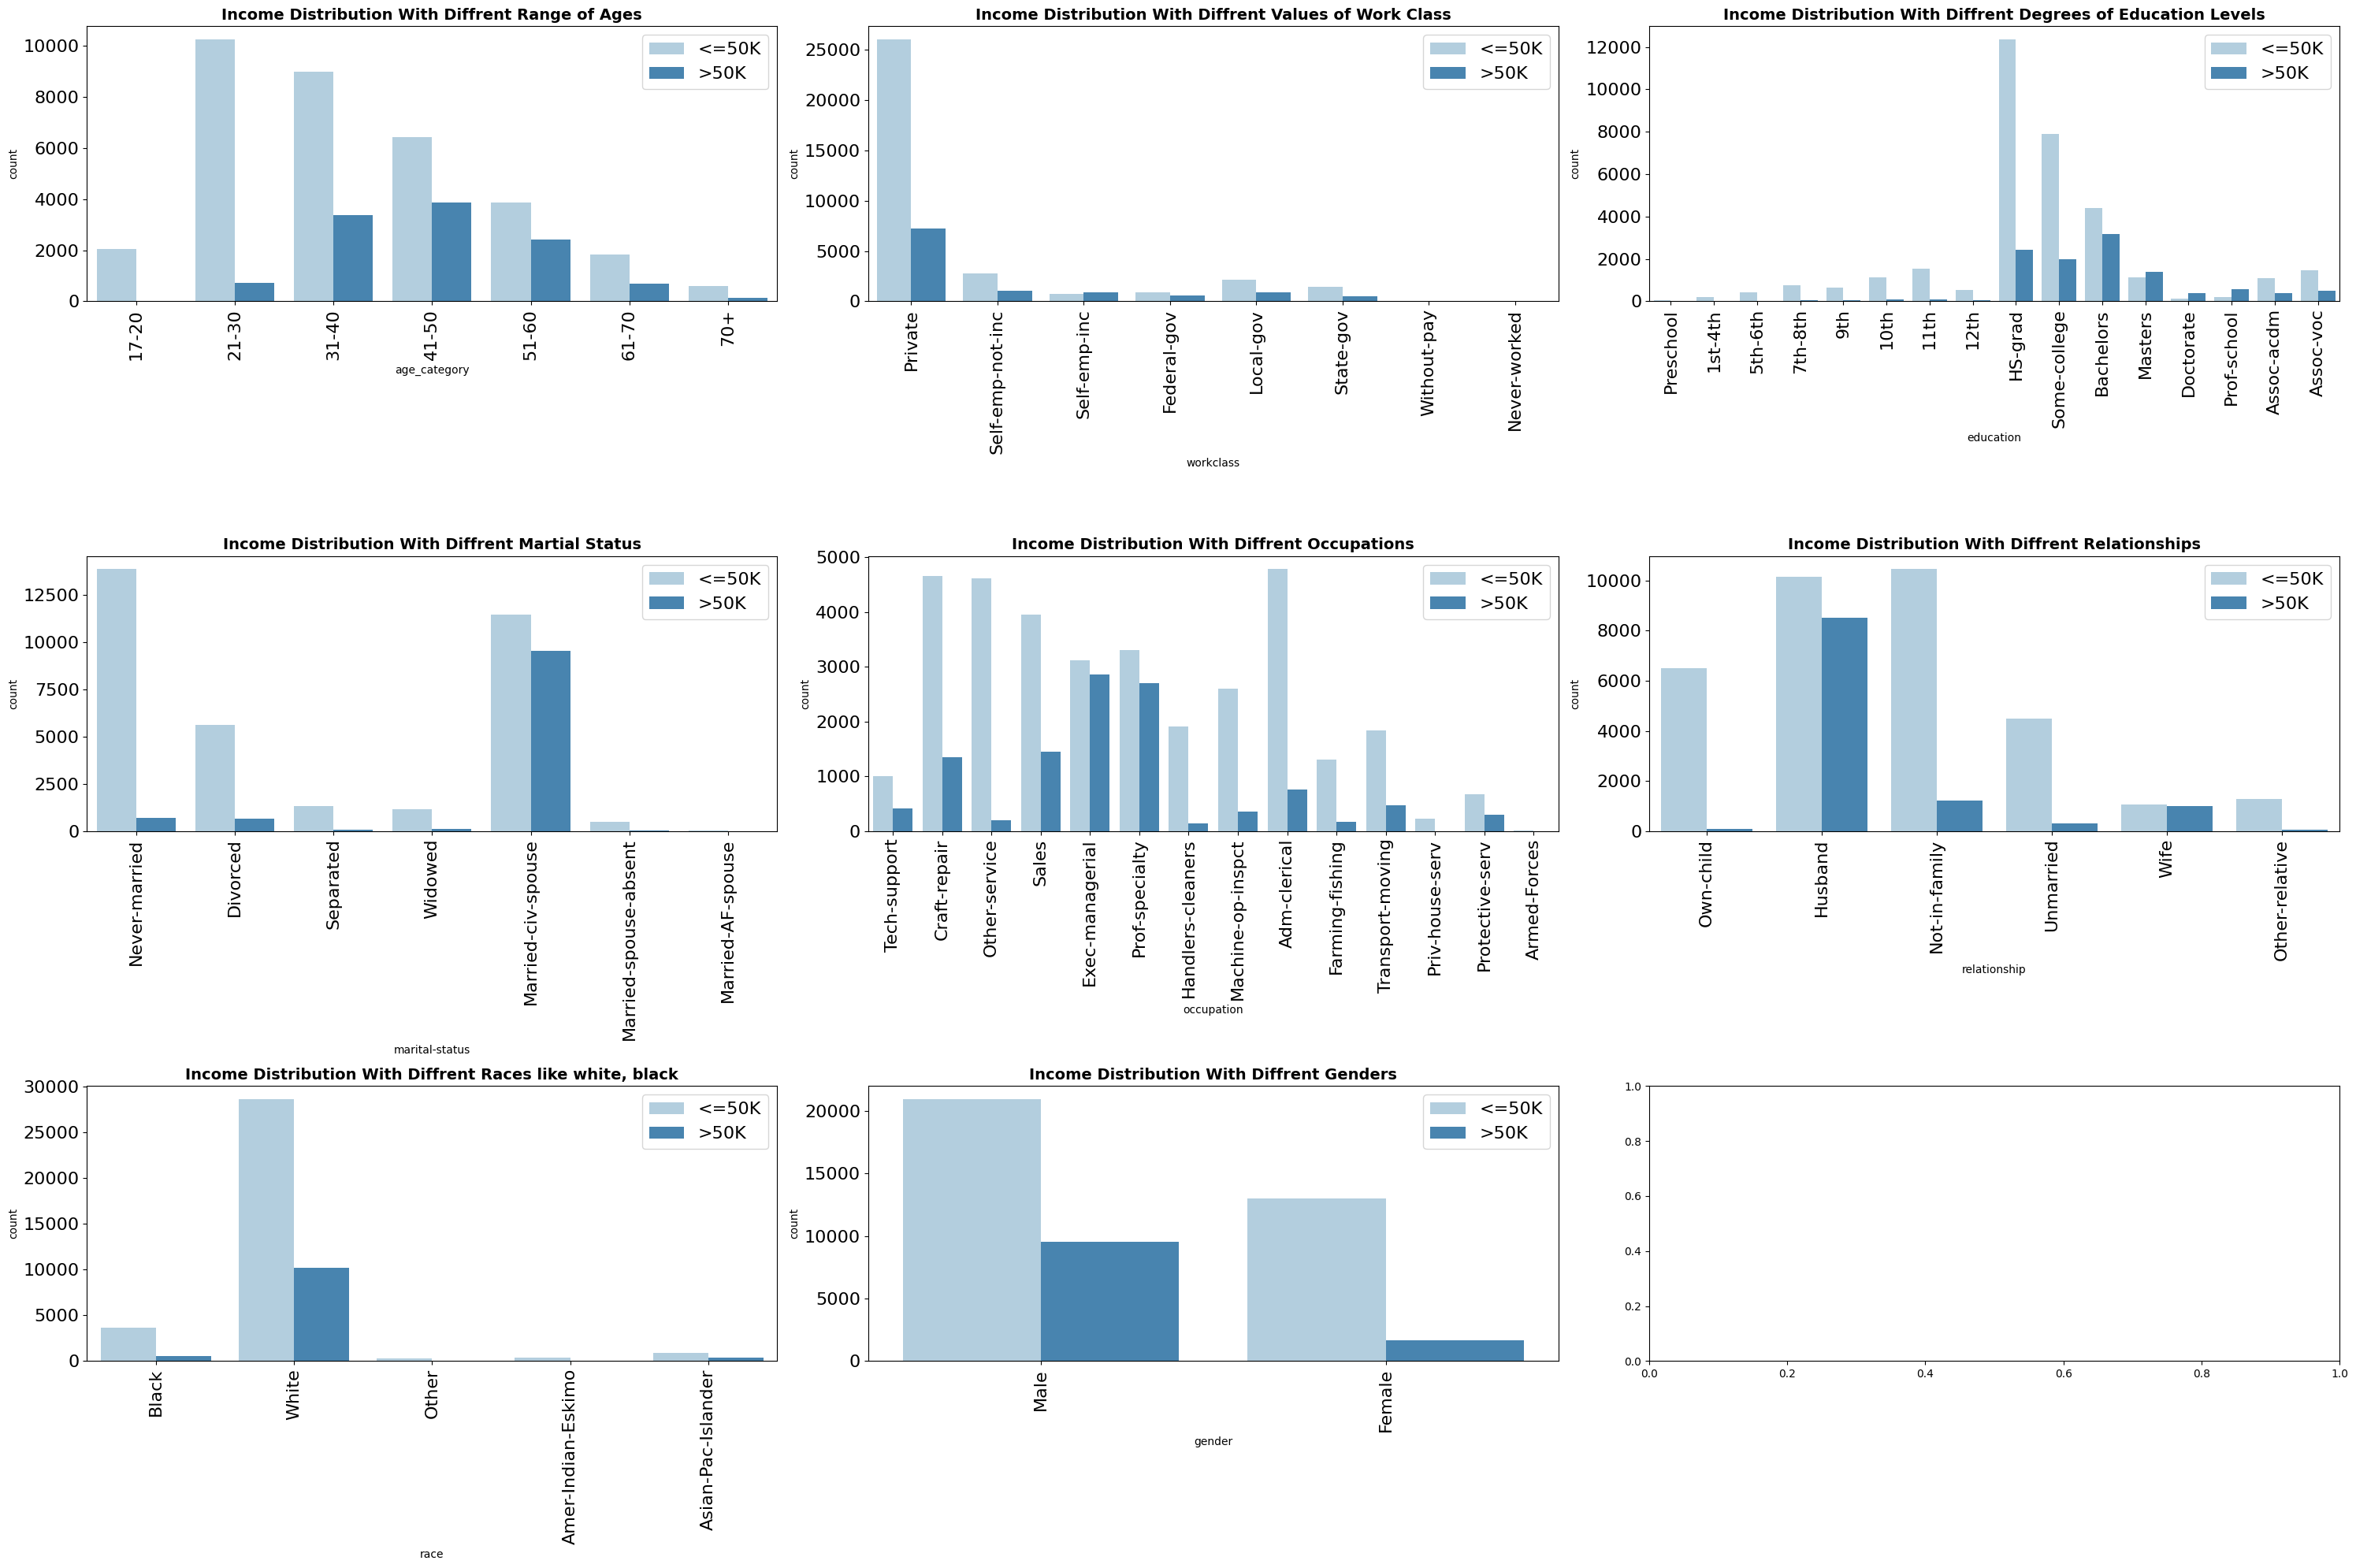

In [ ]:

figure, axes = plt.subplots(3, 3, figsize=(30, 20))
sns.countplot(x='age_category', hue='income', data=DataFrame, palette='Blues', order=AlternativeRange,ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution With Diffrent Range of Ages', fontsize=14, fontweight='bold')
axes[0, 0].tick_params(axis='x', labelrotation=90)
axes[0, 0].tick_params(labelsize=16)
axes[0, 0].legend(fontsize=16)


WorkClassValues = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
sns.countplot(x='workclass', hue='income', data=DataFrame, palette='Blues', order=WorkClassValues, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution With Diffrent Values of Work Class', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', labelrotation=90)
axes[0, 1].tick_params(labelsize=16)
axes[0, 1].legend(fontsize=16)


EducationDegreeValues = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                        'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
                        'Assoc-acdm', 'Assoc-voc']
sns.countplot(x='education', hue='income', data=DataFrame, palette='Blues', order=EducationDegreeValues, ax=axes[0, 2])
axes[0, 2].set_title('Income Distribution With Diffrent Degrees of Education Levels', fontsize=14, fontweight='bold')
axes[0, 2].tick_params(axis='x', labelrotation=90)
axes[0, 2].tick_params(labelsize=16)
axes[0, 2].legend(fontsize=16)


MartialStatusValues = ['Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
sns.countplot(x='marital-status', hue='income', data=DataFrame, palette='Blues', order=MartialStatusValues, ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution With Diffrent Martial Status', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 0].tick_params(labelsize=16)
axes[1, 0].legend(fontsize=16)


OccupationValues = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
sns.countplot(x='occupation', hue='income', data=DataFrame, palette='Blues', order=OccupationValues, ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution With Diffrent Occupations', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(labelsize=16)
axes[1, 1].legend(fontsize=16)


sns.countplot(x='relationship', hue = 'income', data=DataFrame, palette='Blues', ax=axes[1, 2])
axes[1, 2].set_title('Income Distribution With Diffrent Relationships', fontsize=14, fontweight='bold')
axes[1, 2].tick_params(axis='x', labelrotation=90)
axes[1, 2].tick_params(labelsize=16)
axes[1, 2].legend(fontsize=16)



sns.countplot(x='race', hue = 'income', data=DataFrame, palette='Blues', ax=axes[2, 0])
axes[2, 0].set_title('Income Distribution With Diffrent Races like white, black', fontsize=14, fontweight='bold')
axes[2, 0].tick_params(axis='x', labelrotation=90)
axes[2, 0].tick_params(labelsize=16)
axes[2, 0].legend(fontsize=16)


sns.countplot(x='gender', hue = 'income', data=DataFrame, palette='Blues', ax=axes[2, 1])
axes[2, 1].set_title('Income Distribution With Diffrent Genders', fontsize=14, fontweight='bold')
axes[2, 1].tick_params(axis='x', labelrotation=90)
axes[2, 1].tick_params(labelsize=16)
axes[2, 1].legend(fontsize=16)


plt.tight_layout()
plt.show()


In [ ]:
DataFrame['income'] = DataFrame['income'].replace({'<=50K': 0, '>50K': 1})

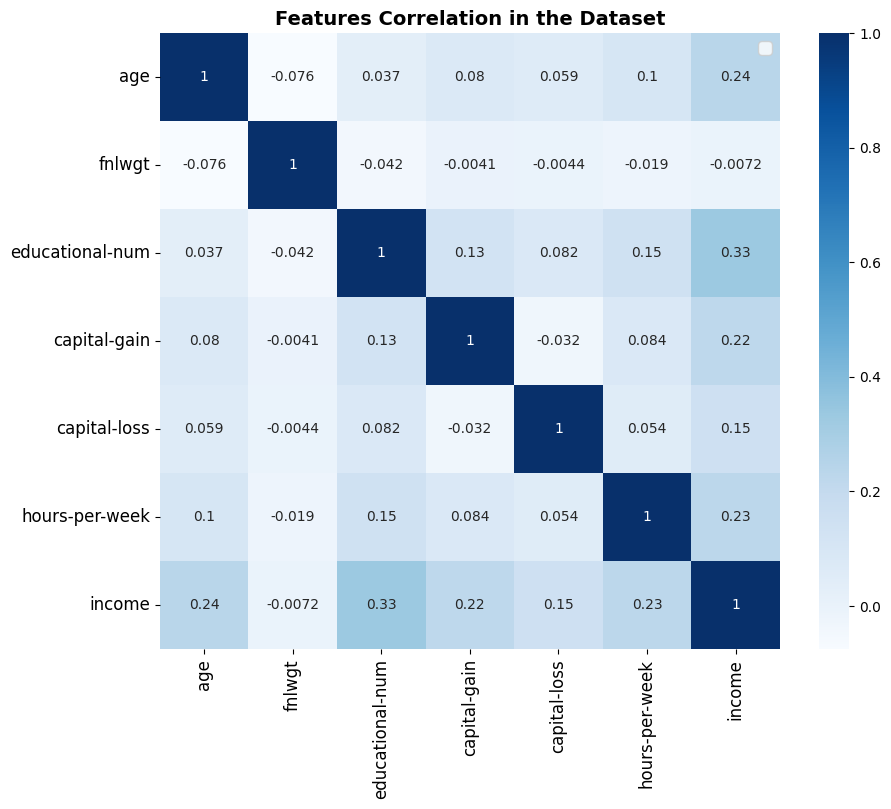

In [ ]:
plt.figure(figsize = (10,8))
plt.title("Features Correlation in the Dataset", fontsize = 14, fontweight = 'bold')
sns.heatmap( DataFrame.corr(), cmap = 'Blues', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)

In [ ]:
DataFrame.drop(['educational-num'], axis = 1, inplace = True)
DataFrame['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'School', inplace = True)
DataFrame['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)
DataFrame.drop('age_category', axis=1, inplace=True)
DataFrame

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,Never-married,Machine-op-inspct,Own-child,Other,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,7688,0,40,United-States,1
5,34,Private,198693,School,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
DataFrame = pd.get_dummies(DataFrame, columns=['workclass'], prefix='workclass')
EduacationDegrees = ['School', 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc']
EncodedEducationDegrees = {education: label for label, education in enumerate(EduacationDegrees)}
DataFrame['education_encoded'] = DataFrame['education'].map(EncodedEducationDegrees)
DataFrame.drop('education', axis=1, inplace=True)
DataFrame = pd.get_dummies(DataFrame, columns=['marital-status'], prefix='marital-status')
DataFrame = pd.get_dummies(DataFrame, columns=['occupation'], prefix='occupation')
DataFrame = pd.get_dummies(DataFrame, columns=['relationship'], prefix='relationship')
DataFrame = pd.get_dummies(DataFrame, columns=['race'], prefix='race')
DataFrame = pd.get_dummies(DataFrame, columns=['native-country'], prefix='native-country')
DataFrame['gender'] = DataFrame['gender'].replace({'Male': 1, 'Female': 0})
DataFrame

,age,fnlwgt,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,1,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,1,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,1,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,1,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,0,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,1,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,1,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = DataFrame.drop(['income'], axis=1)
y = DataFrame['income']

In [ ]:
X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [ ]:
X_normalized

,age,fnlwgt,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.144430,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.051677,1.0,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.219011,1.0,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.099418,1.0,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.125398,1.0,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,0.136986,0.165081,0.0,0.000000,0.0,0.377551,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45171,0.315068,0.095390,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45172,0.561644,0.093721,0.0,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45173,0.068493,0.127292,1.0,0.000000,0.0,0.193878,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31622, 84)
X_test shape: (13553, 84)
y_train shape: (31622,)
y_test shape: (13553,)


Evaluation Metrics Results for k=1:
Accuracy: 0.7919
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10209
           1       0.58      0.56      0.57      3344

    accuracy                           0.79     13553
   macro avg       0.72      0.72      0.72     13553
weighted avg       0.79      0.79      0.79     13553

Precision: 0.5805
Recall: 0.5649
F1-Score: 0.5726
Confusion Matrix:


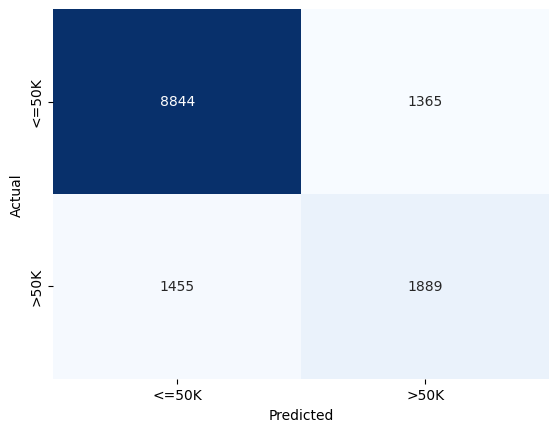

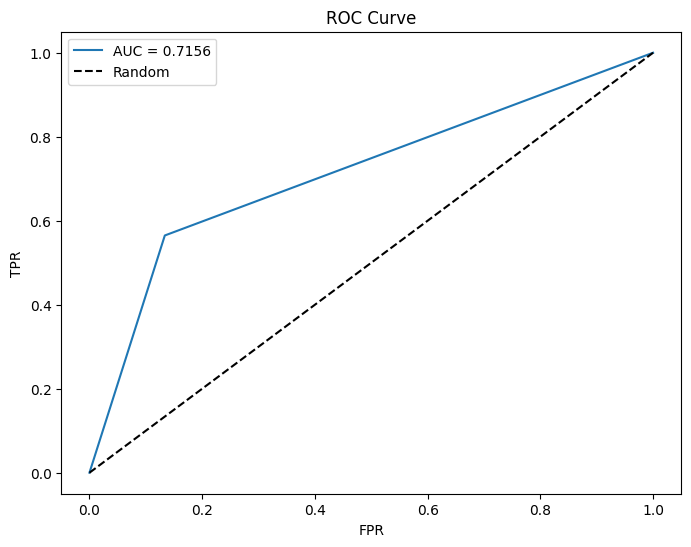

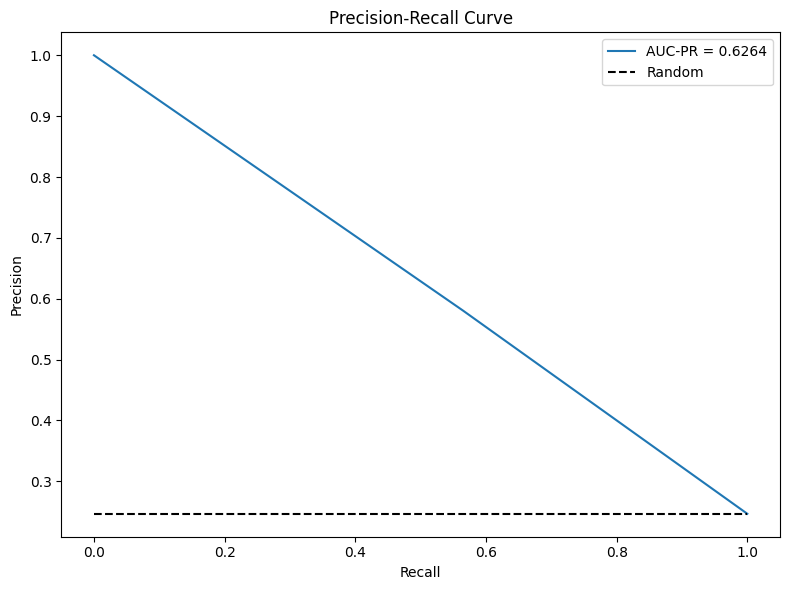


Evaluation Metrics Results for k=3:
Accuracy: 0.8124
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     10209
           1       0.63      0.57      0.60      3344

    accuracy                           0.81     13553
   macro avg       0.75      0.73      0.74     13553
weighted avg       0.81      0.81      0.81     13553

Precision: 0.6327
Recall: 0.5712
F1-Score: 0.6003
Confusion Matrix:


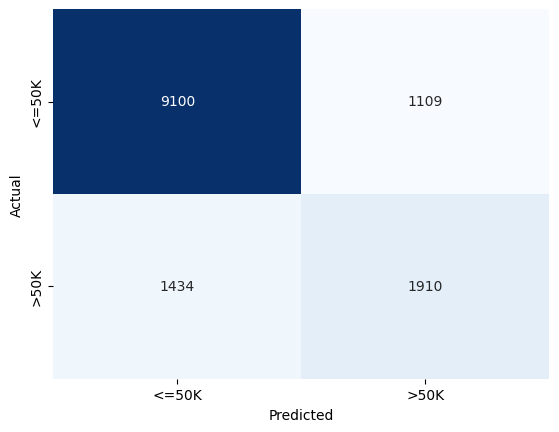

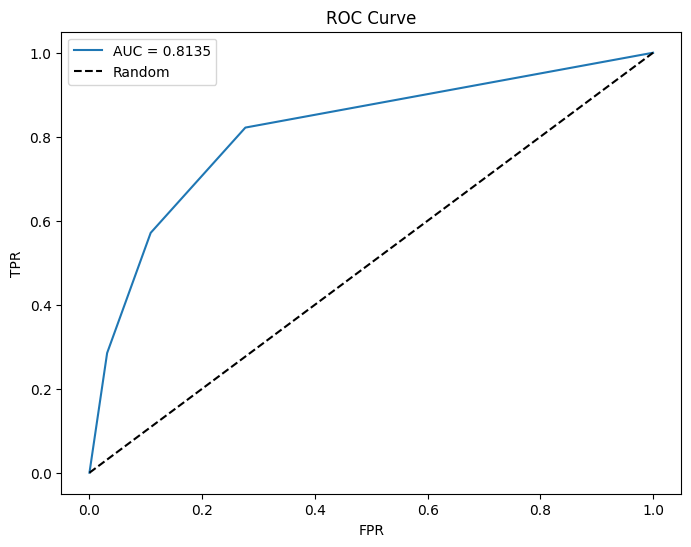

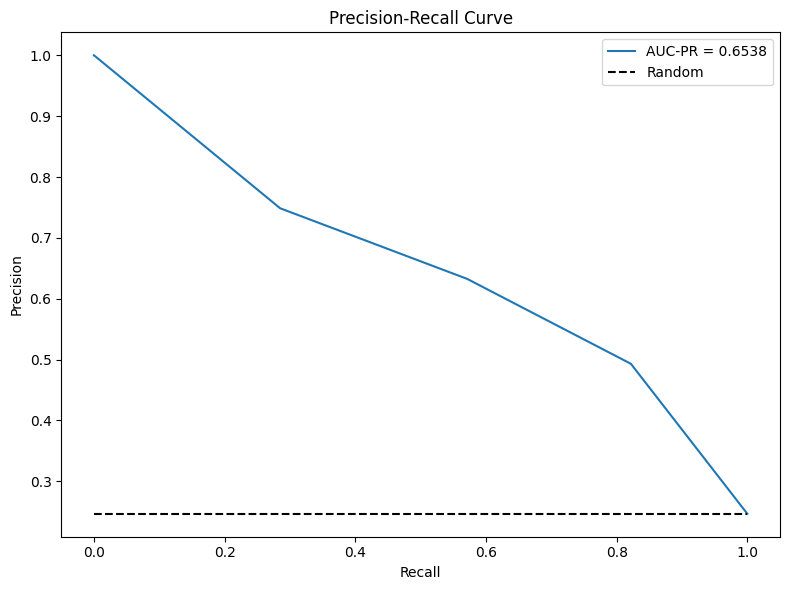

In [ ]:
recalls =[]
precisions=[]
f1s = []
Accuracies =[]

def ModelEvaluation(model, X_test, y_test):
    y_prediected = model.predict(X_test)

    acc = accuracy_score(y_test, y_prediected)
    print(f'Accuracy: {acc:.4f}')
    Accuracies.append(acc)

    print('Classification Report:')
    print(classification_report(y_test, y_prediected))


    precision = precision_score(y_test, y_prediected)
    recall = recall_score(y_test, y_prediected)
    f1 = f1_score(y_test, y_prediected)

    print(f'Precision: {precision:.4f}')

    print(f'Recall: {recall:.4f}')

    print(f'F1-Score: {f1:.4f}')

    f1s.append(f1)


    print('Confusion Matrix:')
    ConfusionMatrix = confusion_matrix(y_test, y_prediected)


    CategoricalTargetLabels = ['<=50K', '>50K']
    sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=CategoricalTargetLabels, yticklabels=CategoricalTargetLabels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    precisions.append(precision)
    recalls.append(recall)


    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AUC-PR = {auc(recall, precision):.4f}')
    positive_ratio = sum(y_test) / len(y_test)
    plt.plot([0, 1], [positive_ratio, positive_ratio], 'k--', label='Random')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()


KnearestNeighbor1 = KNeighborsClassifier(n_neighbors=1)
KnearestNeighbor1.fit(X_train, y_train)

print('Evaluation Metrics Results for k=1:')
ModelEvaluation(KnearestNeighbor1, X_test, y_test)


KnearestNeighbor3 = KNeighborsClassifier(n_neighbors=3)
KnearestNeighbor3.fit(X_train, y_train)


print('\nEvaluation Metrics Results for k=3:')
ModelEvaluation(KnearestNeighbor3, X_test, y_test)


In [ ]:
X_standardized = StandardScaler().fit_transform(X)
StandardizedDataFrame = pd.DataFrame(X_standardized, columns=X.columns)
StandardizedDataFrame

,age,fnlwgt,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.025801,0.350807,0.693823,-0.146811,-0.218899,-0.078493,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
1,-0.042086,-0.945798,0.693823,-0.146811,-0.218899,0.754313,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
2,-0.798790,1.393378,0.693823,-0.146811,-0.218899,-0.078493,-0.179229,3.684098,-1.670951,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
3,0.411937,-0.278424,0.693823,0.876868,-0.218899,-0.078493,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
4,-0.344767,0.084752,0.693823,-0.146811,-0.218899,-0.911299,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,-0.874460,0.639493,-1.441290,-0.146811,-0.218899,-0.245054,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
45171,0.109255,-0.334731,0.693823,-0.146811,-0.218899,-0.078493,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
45172,1.471323,-0.358053,-1.441290,-0.146811,-0.218899,-0.078493,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257
45173,-1.252812,0.111226,0.693823,-0.146811,-0.218899,-1.744105,-0.179229,-0.271437,0.598462,-0.194397,...,-0.037072,-0.062361,-0.021046,-0.047337,-0.034914,-0.025345,-0.023997,0.308208,-0.042903,-0.02257


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(StandardizedDataFrame, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31622, 84)
X_test shape: (13553, 84)
y_train shape: (31622,)
y_test shape: (13553,)


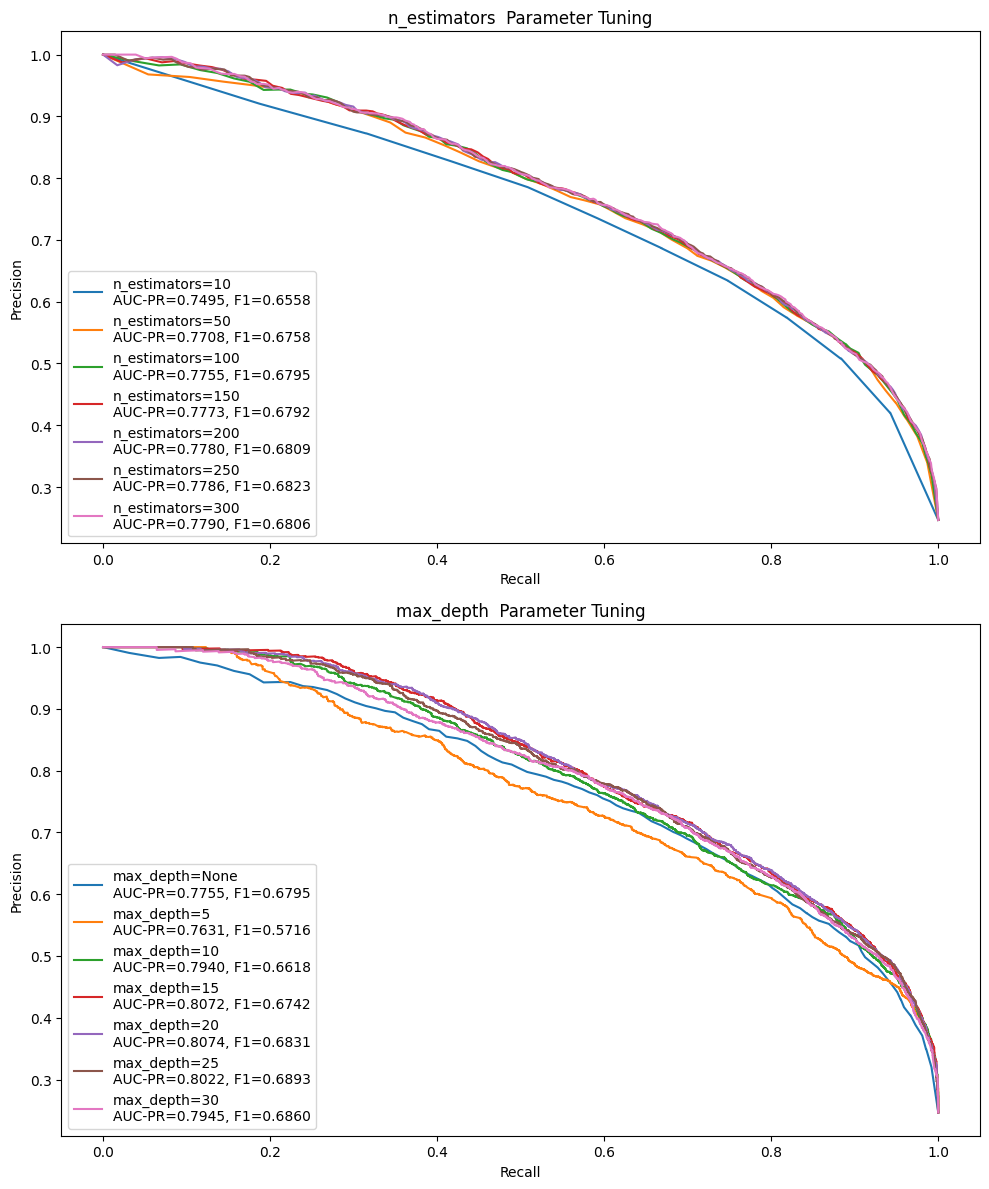

In [ ]:
n_EstimatorsParameterValues = [10, 50, 100, 150, 200, 250, 300]
MaxDepthParameterValues = [None, 5, 10, 15, 20, 25, 30]
figure, axes = plt.subplots(2, 1, figsize=(10, 12))
for values, names, ax in zip([n_EstimatorsParameterValues, MaxDepthParameterValues], ['n_estimators', 'max_depth'], axes):

    auc_values = []
    f1_values = []

    for value in values:

        parameters = {names: value}


        RandomForestModel = RandomForestClassifier(random_state=42, **parameters)
        RandomForestModel.fit(X_train, y_train)


        y_predicted = RandomForestModel.predict(X_test)
        y_prob = RandomForestModel.predict_proba(X_test)[:, 1]


        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        auc_pr = auc(recall, precision)
        f1 = f1_score(y_test, y_predicted)


        auc_values.append(auc_pr)
        f1_values.append(f1)


        ax.plot(recall, precision, label=f'{names}={value}\nAUC-PR={auc_pr:.4f}, F1={f1:.4f}')


    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'{names}  Parameter Tuning')


    ax.legend()


plt.tight_layout()
plt.show()


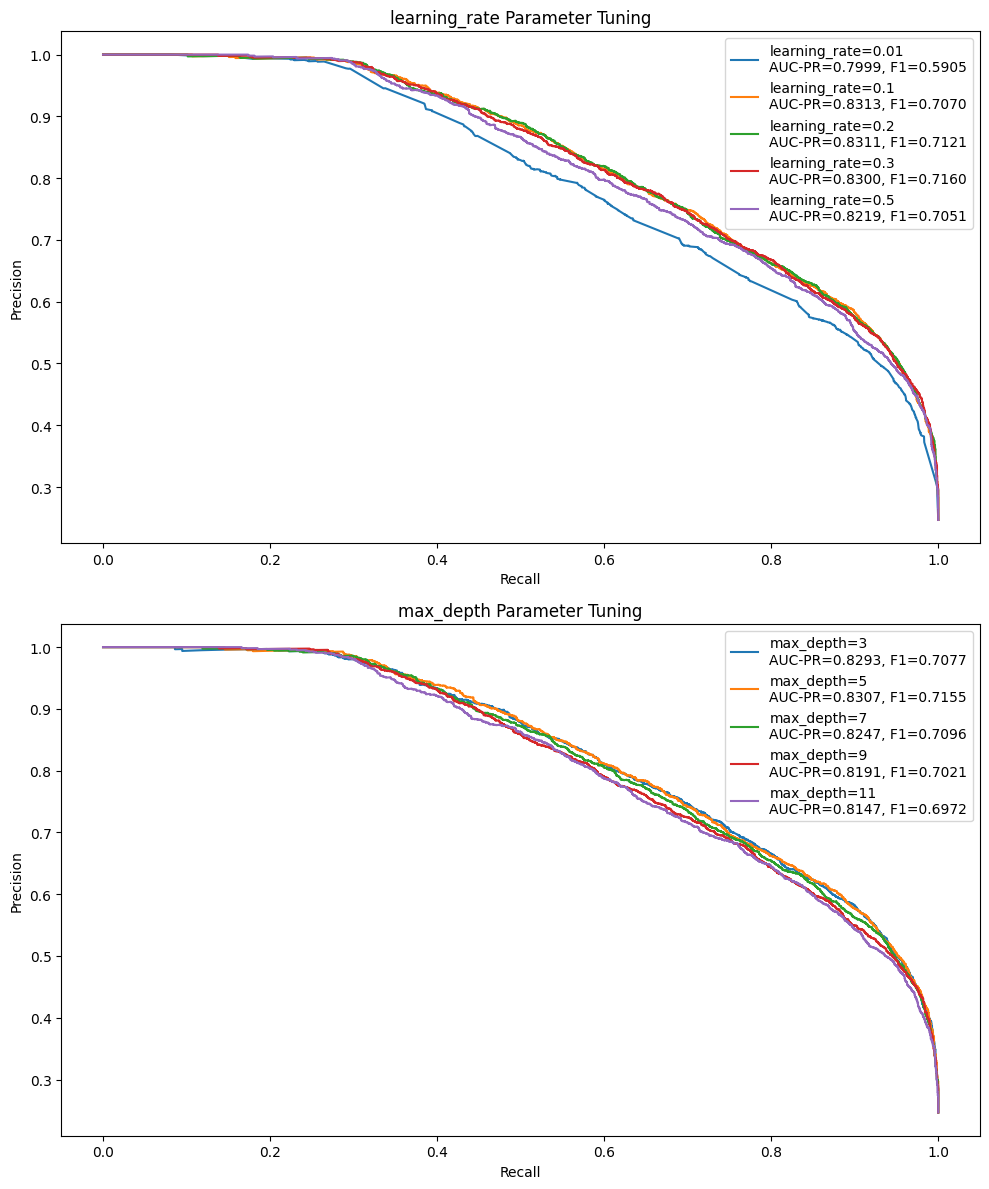

In [ ]:
LearningRateParameterValues = [0.01, 0.1, 0.2, 0.3, 0.5]
MaxDepthParameterValues = [3, 5, 7, 9, 11]

figure, axes = plt.subplots(2, 1, figsize=(10, 12))


for values, names, ax in zip([LearningRateParameterValues, MaxDepthParameterValues], ['learning_rate', 'max_depth'], axes):

    auc_values = []
    f1_values = []

    for value in values:
        parameters = {names: value}
        XGboostModel = XGBClassifier(**parameters, random_state=42)
        XGboostModel.fit(X_train, y_train)
        y_predicted = XGboostModel.predict(X_test)
        y_prob = XGboostModel.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        auc_pr = auc(recall, precision)
        f1 = f1_score(y_test, y_predicted)

        auc_values.append(auc_pr)
        f1_values.append(f1)


        ax.plot(recall, precision, label=f'{names}={value}\nAUC-PR={auc_pr:.4f}, F1={f1:.4f}')


    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'{names} Parameter Tuning')


    ax.legend()


plt.tight_layout()
plt.show()


Evaluation Metrics Results for Random Forest Model with chosen best parameters:
Accuracy: 0.8589
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10209
           1       0.78      0.59      0.67      3344

    accuracy                           0.86     13553
   macro avg       0.83      0.77      0.79     13553
weighted avg       0.85      0.86      0.85     13553

Precision: 0.7826
Recall: 0.5930
F1-Score: 0.6747
Confusion Matrix:


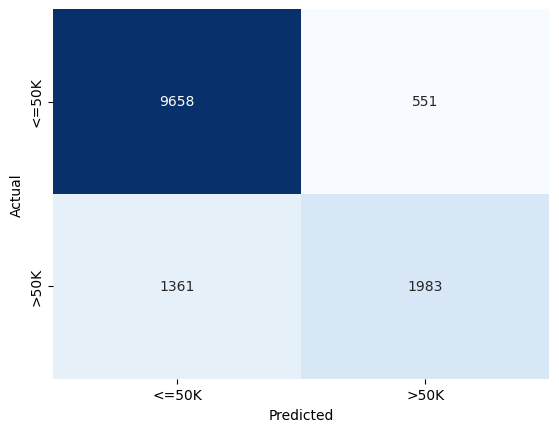

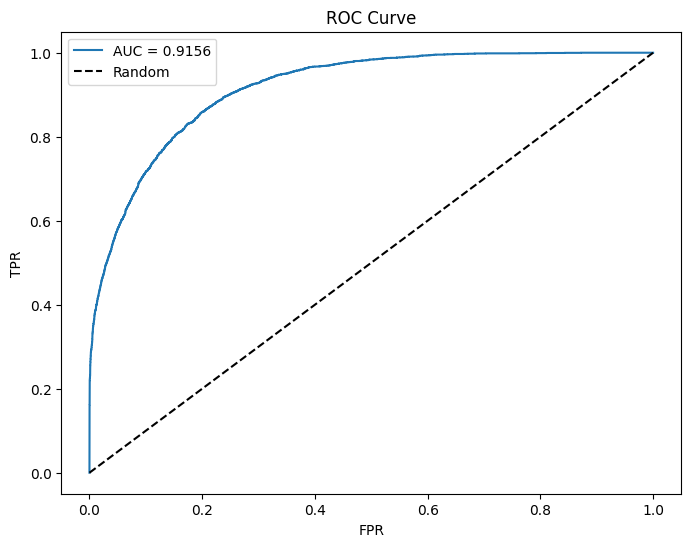

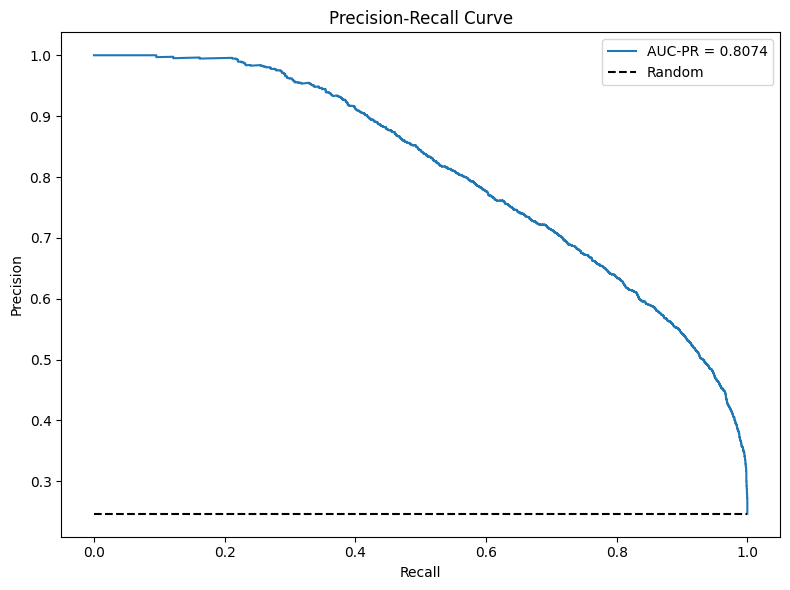

In [ ]:
RandomForestModel = RandomForestClassifier(random_state=42,n_estimators=150, max_depth=15)
RandomForestModel.fit(X_train, y_train)
print('Evaluation Metrics Results for Random Forest Model with chosen best parameters:')
ModelEvaluation(RandomForestModel, X_test, y_test)

Evaluation Metrics Results for XGboosting Model with chosen best parameters:
Accuracy: 0.8704
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10209
           1       0.78      0.66      0.72      3344

    accuracy                           0.87     13553
   macro avg       0.84      0.80      0.82     13553
weighted avg       0.87      0.87      0.87     13553

Precision: 0.7794
Recall: 0.6624
F1-Score: 0.7161
Confusion Matrix:


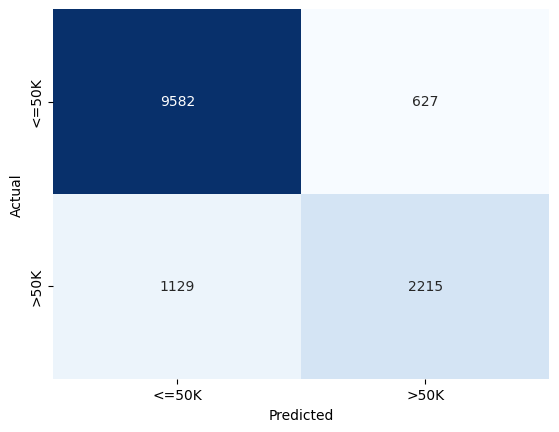

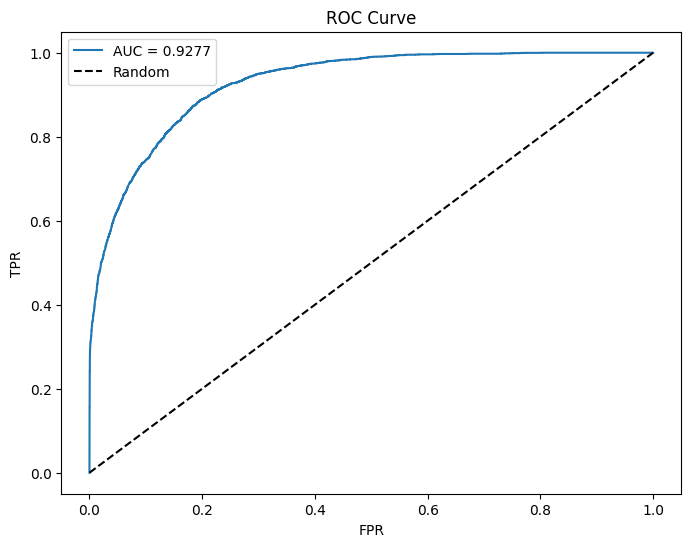

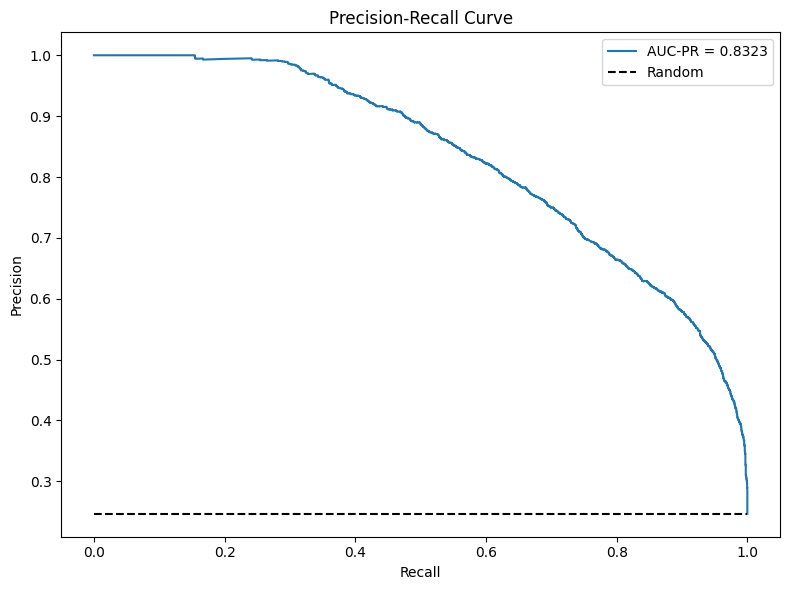

In [ ]:
XGboostModel = XGBClassifier(random_state=42, learning_rate=0.2, max_depth=5)
XGboostModel.fit(X_train, y_train)

print('Evaluation Metrics Results for XGboosting Model with chosen best parameters:')
ModelEvaluation(XGboostModel, X_test, y_test)


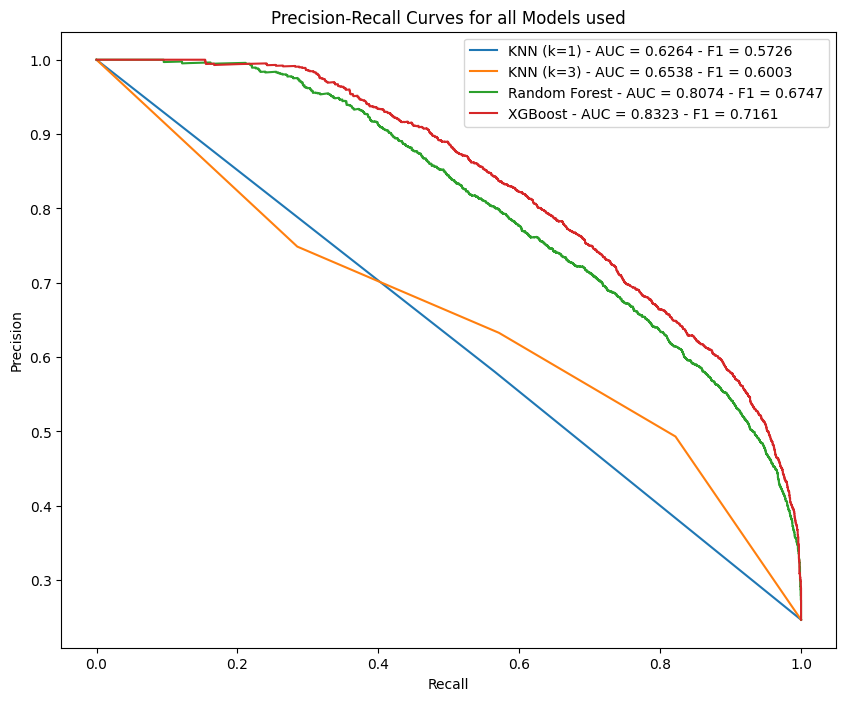

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(recalls[0], precisions[0], label=f'KNN (k=1) - AUC = {auc(recalls[0], precisions[0]):.4f} - F1 = {f1s[0]:.4f}')
plt.plot(recalls[1], precisions[1], label=f'KNN (k=3) - AUC = {auc(recalls[1], precisions[1]):.4f} - F1 = {f1s[1]:.4f}')
plt.plot(recalls[2], precisions[2], label=f'Random Forest - AUC = {auc(recalls[2], precisions[2]):.4f} - F1 = {f1s[2]:.4f}')
plt.plot(recalls[3], precisions[3], label=f'XGBoost - AUC = {auc(recalls[3], precisions[3]):.4f} - F1 = {f1s[3]:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for all Models used')
plt.legend()
plt.show()


In [ ]:


XGboostModel = XGBClassifier(random_state=42, learning_rate=0.2, max_depth=5)
XGboostModel.fit(X_train, y_train)
y_predicted = XGboostModel.predict(X_test)
TargetResults = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_predicted, 'Index': X_test.index})
X = OriginalDataFrame.drop(['income'], axis=1)
y = OriginalDataFrame['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
TargetResults = pd.concat([TargetResults, X_test], axis=1)
MissclassifcationTargets = TargetResults[TargetResults['True Labels'] != TargetResults['Predicted Labels']]
print("Number of Misclassifications:", len(MissclassifcationTargets))
print("\nDetails of Misclassifications:")
misclassifications_label_0 = MissclassifcationTargets[MissclassifcationTargets['True Labels'] == 0]
misclassifications_label_0.to_csv('misclassifications_label_0.csv', index=False)
misclassifications_label_1 = MissclassifcationTargets[MissclassifcationTargets['True Labels'] == 1]
misclassifications_label_1.to_csv('misclassifications_label_1.csv', index=False)
MissclassifcationTargets

Number of Misclassifications: 1756

Details of Misclassifications:


,True Labels,Predicted Labels,Index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
16589,1,0,15341,35,Private,193815,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
48305,1,0,44681,53,Private,36327,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
13672,1,0,12660,50,Private,249096,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States
13109,0,1,12140,47,Private,188386,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
6964,1,0,6431,45,Private,78507,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30814,1,0,28505,29,Local-gov,383745,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1485,40,United-States
8856,0,1,8186,46,Private,91608,Prof-school,15,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
3554,0,1,3289,37,Private,108282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
41400,1,0,38303,37,Self-emp-inc,51264,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States


In [ ]:
CategoricalStatisitics0 = misclassifications_label_0.describe(include=['object'])
print("\nDescriptive Statistics for Categorical Features in Misclassifications label 0:")
CategoricalStatisitics0


Descriptive Statistics for Categorical Features in Misclassifications label 0:


,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,627,627,627,627,627,627,627,627
unique,6,8,7,12,6,5,2,23
top,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,367,243,601,191,540,570,564,568


In [ ]:

CategoricalStatisitics1 = misclassifications_label_1.describe(include=['object'])
print("\nDescriptive Statistics for Categorical Features in Misclassifications label 1:")
CategoricalStatisitics1


Descriptive Statistics for Categorical Features in Misclassifications label 1:


,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,1129,1129,1129,1129,1129,1129,1129,1129
unique,7,15,7,14,6,5,2,24
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,812,463,856,241,756,1027,906,1077


In [ ]:
NumericalStatisitics0 = misclassifications_label_0.describe()
print("\nDescriptive Statistics for Numerical Features in Misclassifications label 0:")
NumericalStatisitics0


Descriptive Statistics for Numerical Features in Misclassifications label 0:


,True Labels,Predicted Labels,Index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,627.0,627.0,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.0,1.0,21637.840510,44.910686,192136.098884,12.153110,190.802233,38.547049,46.295056
std,0.0,0.0,13305.058802,10.192320,104804.192550,1.928971,1836.761339,282.457640,10.856044
min,0.0,1.0,196.000000,23.000000,22154.000000,9.000000,0.000000,0.000000,15.000000
25%,0.0,1.0,9891.500000,38.000000,116932.500000,10.000000,0.000000,0.000000,40.000000
50%,0.0,1.0,21483.000000,44.000000,180195.000000,13.000000,0.000000,0.000000,40.000000
75%,0.0,1.0,32661.500000,51.000000,240263.500000,13.000000,0.000000,0.000000,50.000000
max,0.0,1.0,44994.000000,90.000000,742903.000000,16.000000,34095.000000,3900.000000,99.000000


In [ ]:
NumericalStatisitics1 = misclassifications_label_1.describe()
print("\nDescriptive Statistics for Numerical Features in Misclassifications label 1:")
NumericalStatisitics1


Descriptive Statistics for Numerical Features in Misclassifications label 1:


,True Labels,Predicted Labels,Index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,1129.0,1129.0,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,1.0,0.0,22226.765279,42.135518,180592.577502,10.181577,15.539415,34.792737,44.073516
std,0.0,0.0,13172.276582,11.021910,96269.104833,2.057200,260.719409,268.305379,11.711700
min,1.0,0.0,88.000000,21.000000,20308.000000,2.000000,0.000000,0.000000,4.000000
25%,1.0,0.0,11180.000000,34.000000,113543.000000,9.000000,0.000000,0.000000,40.000000
50%,1.0,0.0,21934.000000,41.000000,173495.000000,10.000000,0.000000,0.000000,40.000000
75%,1.0,0.0,34103.000000,49.000000,226443.000000,11.000000,0.000000,0.000000,50.000000
max,1.0,0.0,45099.000000,90.000000,635913.000000,16.000000,4386.000000,3004.000000,99.000000
